WeatherPy
----

Analysis
 
Although the weather is the warmest for cities at the equator and becomes colder the further north one goes, the southern cities at negative latitudes seem to stay around 40F maximum. This may be because it is Spring/Summer this time of year in the southern hemisphere.

Latitude does not seem to have an affect on humidity, cloudiness or windspeed.

There seems to be groups of cities with the same cloudiness point across all latitudes, as well as oulier cities with high windspeed above 30 mph at higher latitudes. 


In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# install package for someone viewing my code that doesn't already have it
# try:
from citipy import citipy
# except: 
#     import pip 
#     pip.main(['install', 'citipy'])
#     import citipy

# Import API key
from api_keys import api_key

# # Incorporated citipy to determine city based on latitude and longitude
# # from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# base url for openweather API
url = 'https://api.openweathermap.org/data/2.5/weather?'
# units for Fahrenheit temperature at end of url
units = 'units=imperial'

    

## Generate Cities List

In [23]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [47]:
# create open lists that will store information retrieved from json
lat = []
temp = []
city_names = []
wind_speed = []
humidity = []
clouds = []

# create for loop to iterate through the cities list, to pick out each city 
# that will be added to construct url for making calls to API
for city in cities:
    # use a try and except block, to search for each city within the cities list but print not 
    # found when cities are not found after making the API call 
    try:
        # url construction for openweather for each city in cities list
        queryUrl = url + 'q=' + city + '&' + units + '&' + "appid="+ api_key
        # request data in json format
        weatherCity = requests.get(queryUrl).json()

        # pick out specific key values within each city json 
        # and append into their respective lists above
        wind_speed.append(weatherCity['wind']['speed'])
        lat.append(weatherCity['coord']['lat'])
        city_names.append(weatherCity['name'])
        humidity.append(weatherCity['main']['humidity'])
        temp.append(weatherCity['main']['temp'])
        clouds.append(weatherCity['clouds']['all'])
    # print not found when data on the city is not available in openweather API, then pass to 
    # the next city
    except:
        print(city + " not found")
        
        pass
        

asau not found
illoqqortoormiut not found
khatanga not found
labutta not found
dien bien not found
barentsburg not found
amderma not found
taolanaro not found
olafsvik not found
nizhneyansk not found
belushya guba not found
mys shmidta not found
akyab not found
umzimvubu not found
lolua not found
tumannyy not found
jomalig not found
samusu not found
ust-kamchatsk not found
bossembele not found
haibowan not found
wulanhaote not found
ruatoria not found
sakakah not found
urumqi not found
satitoa not found
sataua not found
karpenision not found
bengkulu not found
yanan not found
falealupo not found
tsihombe not found
malakal not found
gurgan not found
vaitupu not found
kachikau not found
temaraia not found
bacuit not found
asfi not found
palabuhanratu not found
bolonchen not found
tambura not found
rawah not found
galiwinku not found
ngukurr not found
artyk not found
tasbuget not found
asayita not found
marv dasht not found
tubruq not found
cheuskiny not found
marcona not found
bardiyah n

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [48]:
# create new dataframe using dictionaries. Label new column with a name of choice as key, 
# and the list from above as its value 
cityWeatherDf = pd.DataFrame({'city': city_names, 
                              'latitude': lat, 
                              'temperature': temp, 
                              'humidity': humidity, 
                              'windspeed': wind_speed,
                              'cloudiness': clouds})
cityWeatherDf



,city,latitude,temperature,humidity,windspeed,cloudiness
0,Mackay,53.65,42.82,65,3.51,75
1,Gerash,27.67,46.65,94,2.73,12
2,Quatre Cocos,-20.21,75.20,94,8.05,75
3,Pangnirtung,66.15,10.40,51,10.29,90
4,Cape Town,-33.93,64.40,88,8.05,0
5,Bambous Virieux,-20.34,75.20,94,8.05,75
6,Berdigestyakh,62.10,-8.48,64,4.41,64
7,Albany,42.65,26.87,43,8.05,40
8,Cabedelo,-6.97,79.54,93,12.68,100
9,Arraial do Cabo,-22.97,78.42,82,21.85,24


In [49]:
# get info on data frame
cityWeatherDf.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 6 columns):
city           550 non-null object
latitude       550 non-null float64
temperature    550 non-null float64
humidity       550 non-null int64
windspeed      550 non-null float64
cloudiness     550 non-null int64
dtypes: float64(3), int64(2), object(1)
memory usage: 25.9+ KB


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

Text(0,0.5,'Temperature (F)')

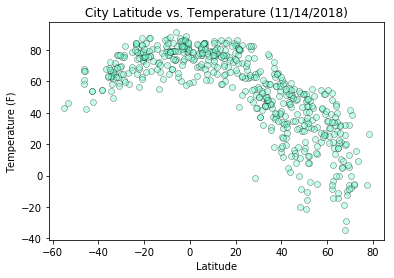

In [50]:
# create scatter plot of latitude vs temperature
plt.scatter(x=lat, y= temp, color="aquamarine", 
            edgecolors='black', marker='o', alpha=0.45, linewidth=0.6)

# label title and axis
plt.title('City Latitude vs. Temperature (11/14/2018)')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')

# save figure
plt.savefig("/Users/marlonschieber/Desktop/temperature.png", bbox_inches='tight', pad_inches=2)



#### Latitude vs. Humidity Plot

Text(0,0.5,'Humidity (%)')

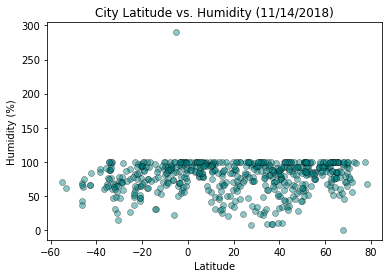

In [51]:
# create scatter plot of latitude vs temperature
plt.scatter(x=lat, y= humidity, color="teal", 
            edgecolors='black', marker='o', alpha=0.45, linewidth=0.6)

# label title and axis
plt.title('City Latitude vs. Humidity (11/14/2018)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# save figure
plt.savefig("/Users/marlonschieber/Desktop/humidity.png", bbox_inches='tight', pad_inches=2)



#### Latitude vs. Cloudiness Plot

Text(0,0.5,'Cloudiness')

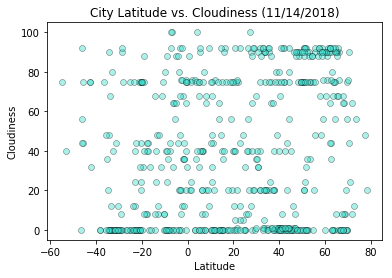

In [60]:
plt.scatter(x=lat, y= clouds, color="turquoise", 
            edgecolors='black', marker='o', alpha=0.45, linewidth=0.6)

plt.title('City Latitude vs. Cloudiness (11/14/2018)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

plt.savefig("/Users/marlonschieber/Desktop/cloudiness.png", bbox_inches='tight', pad_inches=2)



#### Latitude vs. Wind Speed Plot

Text(0,0.5,'Wind Speed (mph)')

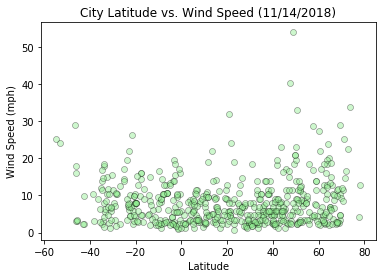

In [62]:
plt.scatter(x=lat, y= wind_speed, color="lightgreen", 
            edgecolors='black', marker='o', alpha=0.45, linewidth=0.6)

plt.title('City Latitude vs. Wind Speed (11/14/2018)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

plt.savefig("/Users/marlonschieber/Desktop/windspeed.png", bbox_inches='tight', pad_inches=2)

